# Task 1.

In [40]:
import pandas
import numpy
import codecs
import re
import scipy

In [7]:
#reading input file
sentences_file = open("sentences.txt", "r")
data = sentences_file.readlines()

In [18]:
#tokenization
tokenized_sentences = []
for sentence in data:
    sentence = sentence.lower()
    sentence = filter(None, re.split('[^a-z]', sentence))
    tokenized_sentences.append(sentence)

In [30]:
#counting words
count_dict = {}
for sentence in tokenized_sentences:
    for word in sentence:
        if word not in count_dict:
            count_dict[word] = 1
        else:
            count_dict[word] += 1


In [27]:
array = numpy.ndarray(shape = (len(data), len(count_dict)), dtype = 'float')
print(array.shape)

(22L, 254L)


In [35]:
for sentence in tokenized_sentences:
    for word in sentence:
        #print(sentence)
        #print(word)
        #print(tokenized_sentences.index(sentence), sentence.index(word))
        array[tokenized_sentences.index(sentence)][sentence.index(word)] = count_dict[word]

In [56]:
from scipy.spatial import distance
min_1 = 1.0
min_2 = 1.0
min_num_1 = 0
min_num_2 = 0
row_num = 0
first_sentence = array[0]
for row in array:
    if numpy.array_equal(row, first_sentence):
        row_num += 1
        continue
    cos_dist = distance.cosine(first_sentence, row)
    if cos_dist < min_1:
        min_2 = min_1
        min_num_2 = min_num_1
        min_1 = cos_dist
        min_num_1 = row_num
    elif cos_dist < min_2:
            min_2 = cos_dist
            min_num_2 = row_num
    row_num += 1
print(min_1, min_2)
print(min_num_1, min_num_2)

(0.2087489362611361, 0.37599226450142453)
(9, 21)


# Task 2.

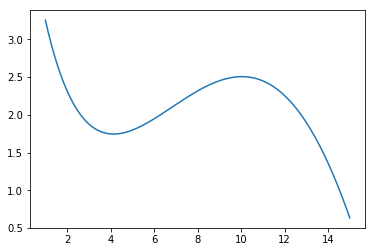

In [146]:
import math
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(- x / 2)

x_array = list(numpy.linspace(1., 15., 200))
y_array = []
for x in x_array:
    y_array.append(f(x))
plt.plot(x_array, y_array)
plt.show()

[ 2.46864077 -0.50641164  0.10181194 -0.0050803 ]


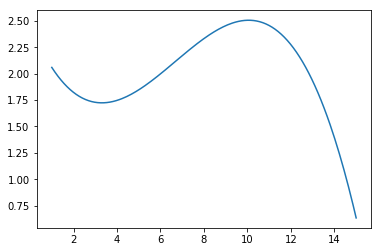

In [172]:
import matplotlib.pyplot as plt

def my_func(values, f_values):
    amount_of_c = len(f_values)
    A = numpy.random.rand(amount_of_c, amount_of_c)
    for (x,y), value in numpy.ndenumerate(A):
        if y == 0:
            A[x,y] = 1.0
        else:
            A[x,y] = values[x] ** y
    b = numpy.array(f_values)
    coef_list = numpy.linalg.solve(A, b)
    x_array = list(numpy.linspace(1., 15., 200))
    y_array = []
    for x_c in x_array:
        res = 0.0
        pow_ = 0
        for coef in coef_list:
            res += coef * (x_c ** pow_)
            pow_ +=1
        y_array.append(res)
    print(coef_list)
    plt.plot(x_array, y_array)
    plt.show()

values = [1, 4, 10, 15]
f_values = [f(1), f(4), f(10), f(15)]
my_func(values, f_values)